# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 146MB/s]


Начнем с необходимых приготовлений.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [3]:
# Paste your code here.
coins = pd.read_csv("coins.csv")

Посмотрим что получилось

In [4]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [5]:
coins['name'].nunique()

70

### 2. За какой период данные мы имеем? (0.4 балла)

In [6]:
print('с',min(coins['date']), 'до' ,max(coins['date']))

с 2013-04-28 до 2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [7]:
print(coins.isnull().values.any())
#Пропуски есть
coins.info()
#Пропуски есть в столбцах средней цены, количества транзакций, объема монет и количестве адресов
#Все они числовой природы и скорее всего вызваны неполадками в работе биржи или невозможностью обработки очень большого количества данных


True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37588 entries, 0 to 37587
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             37588 non-null  object 
 1   price            37261 non-null  float64
 2   txCount          36068 non-null  float64
 3   txVolume         35758 non-null  float64
 4   activeAddresses  36068 non-null  float64
 5   symbol           37588 non-null  object 
 6   name             37588 non-null  object 
 7   open             37588 non-null  float64
 8   high             37588 non-null  float64
 9   low              37588 non-null  float64
 10  close            37588 non-null  float64
 11  volume           37588 non-null  float64
 12  market           37588 non-null  float64
dtypes: float64(10), object(3)
memory usage: 3.7+ MB


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [8]:
coins[coins['price'] == coins['price'].max()]
# 2017-12-17 у BTC

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
25971,2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

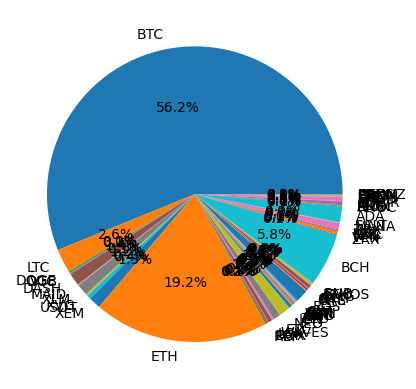

In [9]:
total_cap = [(i, coins[coins['symbol'] == i]['market'].sum()) for i in coins['symbol'].unique()]
plt.pie(list(map(lambda x: x[1], total_cap)), labels= list (map(lambda x: x[0], total_cap)), autopct='%1.1f%%')
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [10]:
#Нам понадобится скачать библиотеку, чтобы взять оттуда график кэндл стиков, это можно сделать закоменченной командой далее

#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

def plot_fancy_price_action(coins, symbol, start_date, end_date):

    dat_1 = coins[(coins['date'] <= end_date) & (coins['date'] >= start_date) & (coins['symbol'] == symbol)]
    dat = dat_1.loc[:, ['date', 'open', 'high', 'low', 'close']]


    #Форматируем даты в нужный нам формат
    dat['date'] = pd.to_datetime(dat['date'])
    dat['date'] = dat['date'].apply(mpl_dates.date2num)
    dat = dat.astype(float)
  

    fig, ax = plt.subplots(figsize=(14,9))
    candlestick_ohlc(ax, dat.values, width=0.6, colorup='green', colordown='red', alpha=0.4)

    
    #Здесь аккуратно ставим даты
    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()


    ax.set_xlabel('Дата')
    ax.set_ylabel('Цена в $')
    fig.suptitle(f'Изменение курса {symbol} за период с {start_date} по {end_date}')
    plt.grid()
  
    plt.show()

#Для установки правильных дат помог код со следующего ресурса: https://www.geeksforgeeks.org/how-to-create-a-candlestick-chart-in-matplotlib/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 306.0 kB 5.3 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8436 sha256=42aad33f00ac898ba72f79d2f0c0f697d16592912dce7e7a73a883439e6f5c2c
  Stored in directory: /tmp/pip-ephem-wheel-cache-r28pj2rq/wheels/c7/4b/6c/aed5718103edc47602ae7c854c0bfd4eb42cece1bf85058b70
Successfully built mpl-finance


Посмотрим, что получилось:

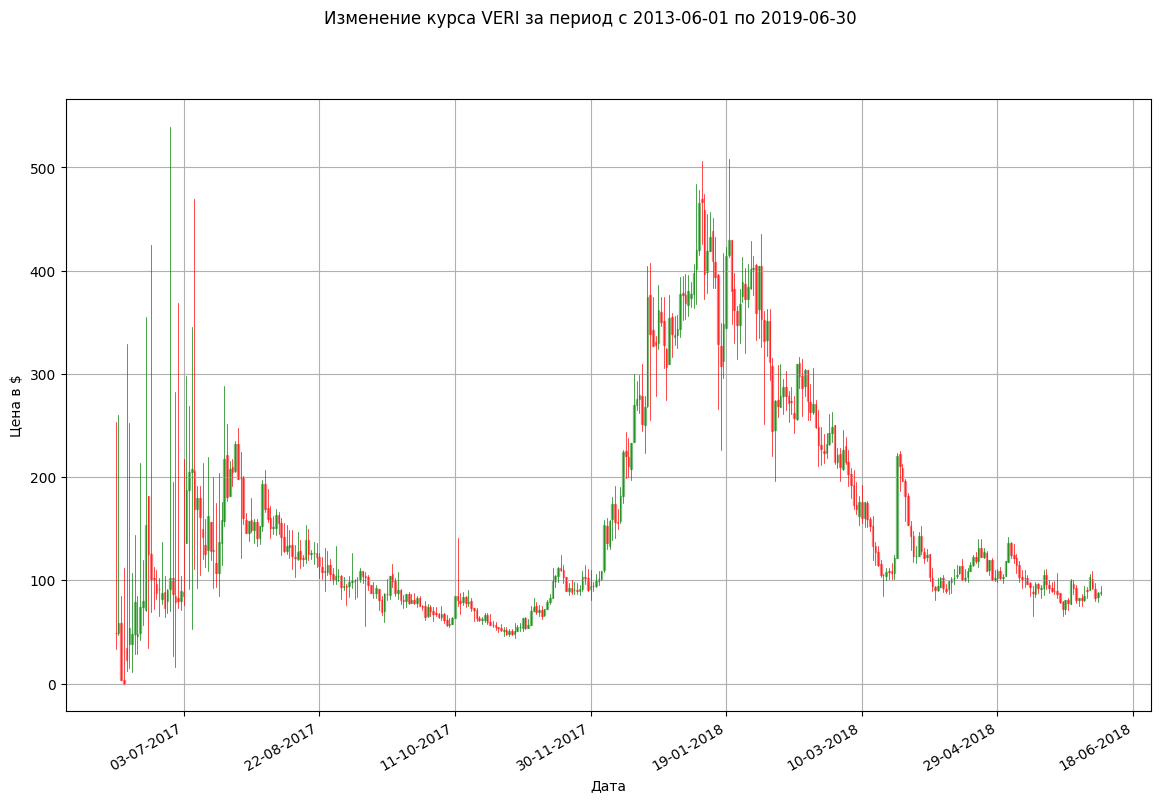

In [11]:
  plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [12]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
  mass = coins[(coins['symbol'] == symbol) & (coins['date'] <= end_date) & (coins['date'] >= start_date)]
  pnd = [(i, float(max(mass[mass['date'] == i]['high'])) / max(float(max(mass[mass['date'] == i]['open'])), float(max(mass[mass['date'] == i]['close'])))) for i in mass['date']]
  return max(pnd, key=lambda x: x[1])
    # Paste your code here

In [13]:
pnd_s = find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')
print(f'Максимальный pnd размером {pnd_s[1]} был достигнут {pnd_s[0]}')

Максимальный pnd размером 1.1428940004366206 был достигнут 2017-11-29


Сравните эти значения для разных монет:

In [14]:
comparison = []
for i in list(coins['symbol'].unique()):
  fu = find_most_severe_pump_and_dump(coins, symbol=i, start_date='2017-06-01', end_date='2018-06-01')
  comparison.append((i, fu[0], fu[1]))

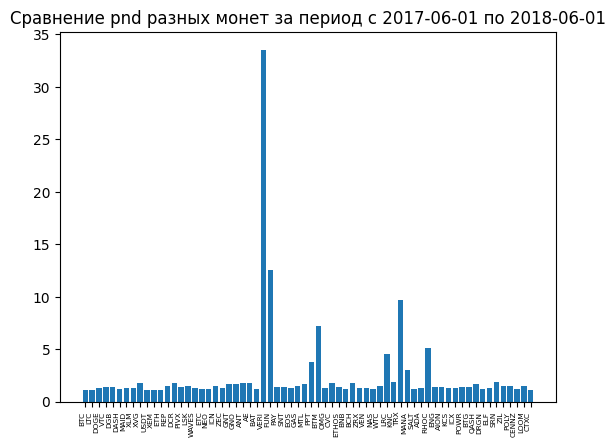

In [15]:
plt.bar([comparison[j][0] for j in range(len(comparison))], [comparison[i][2] for i in range(len(comparison))])
plt.title('Сравнение pnd разных монет за период с 2017-06-01 по 2018-06-01')
plt.xticks(rotation=90, ha='right', size=5.3)
plt.show()

In [16]:
pnd_max = max(comparison, key=lambda x: x[2])
print(f'Максимальный pnd размером {pnd_max[2]} был у монеты {pnd_max[0]} {pnd_max[1]}')

Максимальный pnd размером 33.549253731343285 был у монеты VERI 2017-06-11


In [17]:
pnd_min = min(comparison, key=lambda x: x[2])
print(f'Минимальный pnd размером {pnd_min[2]} был у монеты {pnd_min[0]} {pnd_min[1]}')

Минимальный pnd размером 1.099009900990099 был у монеты USDT 2017-11-12


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [18]:
def compute_roi(coins, investments, start_date, end_date):
    #quan - количество
    quan = np.array([investments[i] / float(coins[(coins['symbol'] == i) & (coins['date'] == start_date)]['price']) for i in investments.keys()])
    end_prices = np.array([float(coins[(coins['symbol'] == i) & (coins['date'] == end_date)]['price']) for i in investments.keys()])
    end_price = np.dot(quan, end_prices)

    return (end_price - sum(investments.values())) / sum(investments.values())
    

In [19]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [20]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [21]:

def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here
    data = coins[coins['symbol'] == symbol]

    rolling_mean = data['price'].rolling(window=window).mean()
    rolling_std = data['price'].rolling(window=window).std()

    high_e = rolling_mean + width * rolling_std
    low_e = rolling_mean - width * rolling_std


    fig, ax = plt.subplots(figsize=(14,9))
    plt.plot(pd.to_datetime(data['date']), high_e, color = 'blue', label = 'Верхняя граница Боллинджера')
    plt.plot(pd.to_datetime(data['date']), low_e, color = 'green', label = 'Нижняя граница Боллинджера')
    plt.plot(pd.to_datetime(data['date']), data['price'], color = 'red', label = 'Настоящая цена')
    plt.plot(pd.to_datetime(data['date']), rolling_mean, color = 'black', label = 'Скользящее среднее')
    plt.title(f'Границы Боллинджера, скользящее среднее и настоящая цена для {symbol}')
    plt.xticks(rotation=30)
    plt.xlabel('Даты')
    plt.ylabel('Цены в $')
    plt.legend(loc = 'upper left')
    plt.show()

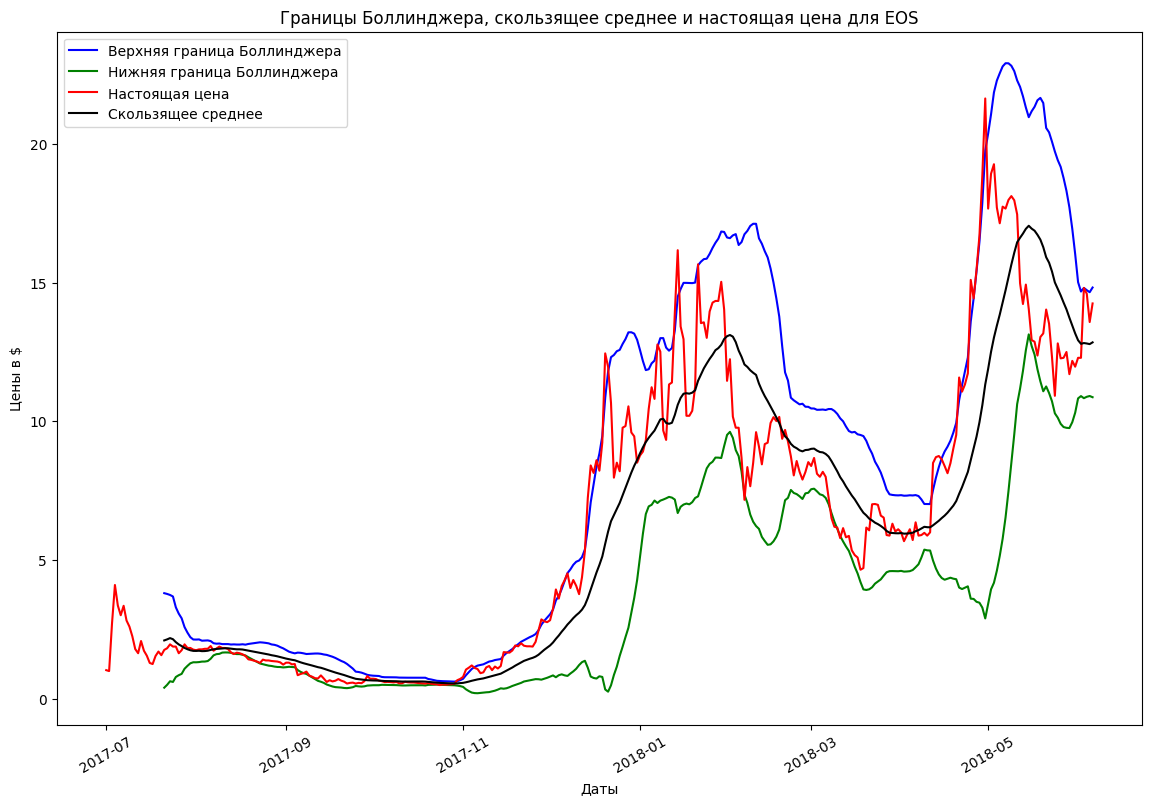

In [22]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут** Правило выполняется, но неидеально. График действительно имеет тенденцию отражаться от границ Боллинджера, но порою перескакивает или не доходит до них.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [23]:
#Предпологаем, что все монеты существуют по конечный день
def plot_coins_capitalizations(coins, symbols, start_date):

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,9))

    for i in symbols:
      coin_info = coins[(coins['symbol'] == i) & (coins['date'] >= start_date)]
      ax1.plot(pd.to_datetime(coin_info['date']), coin_info['market'], label=i)
    ax1.legend(loc = 'upper left')
    ax1.grid()
    ax1.set_xlabel('Даты')
    ax1.set_ylabel('Цена в $ (экспоненциальная запись)')
    ax1.set_title(f'Общие капитализации монет {", ".join(symbols)}')



    whole_market = np.array([np.sum(np.array(list(coins[coins['date'] == i]['market']))) for i in coins[coins['date'] >= start_date]['date'].unique()])
    coins_values = dict()

    for i in range(len(symbols)):
      coin_info = coins[(coins['symbol'] == symbols[i]) & (coins['date'] >= start_date)]
      coin_market = coin_info['market']
      
      if len(coin_market) < len( whole_market):
        zer = np.zeros(len( whole_market) - len(coin_info['market']))
        zer = np.append(zer, coin_market)
        coin_market = zer

      coin_share = np.array(list(coin_market)) / whole_market
      coins_values[symbols[i]] = coin_share

    Other = np.ones(len(whole_market))
    for i in coins_values.keys():
      Other -= coins_values[i]
    coins_values['Other'] = Other

    ax2.stackplot(pd.to_datetime(coins[coins['date'] >= start_date]['date'].unique()), coins_values.values(), labels = coins_values.keys())
    ax2.legend()
    ax2.set_xlabel('Даты')
    ax2.set_ylabel('Доли')
    ax2.set_title(f'Доли капитализаций монет {", ".join(symbols)}')



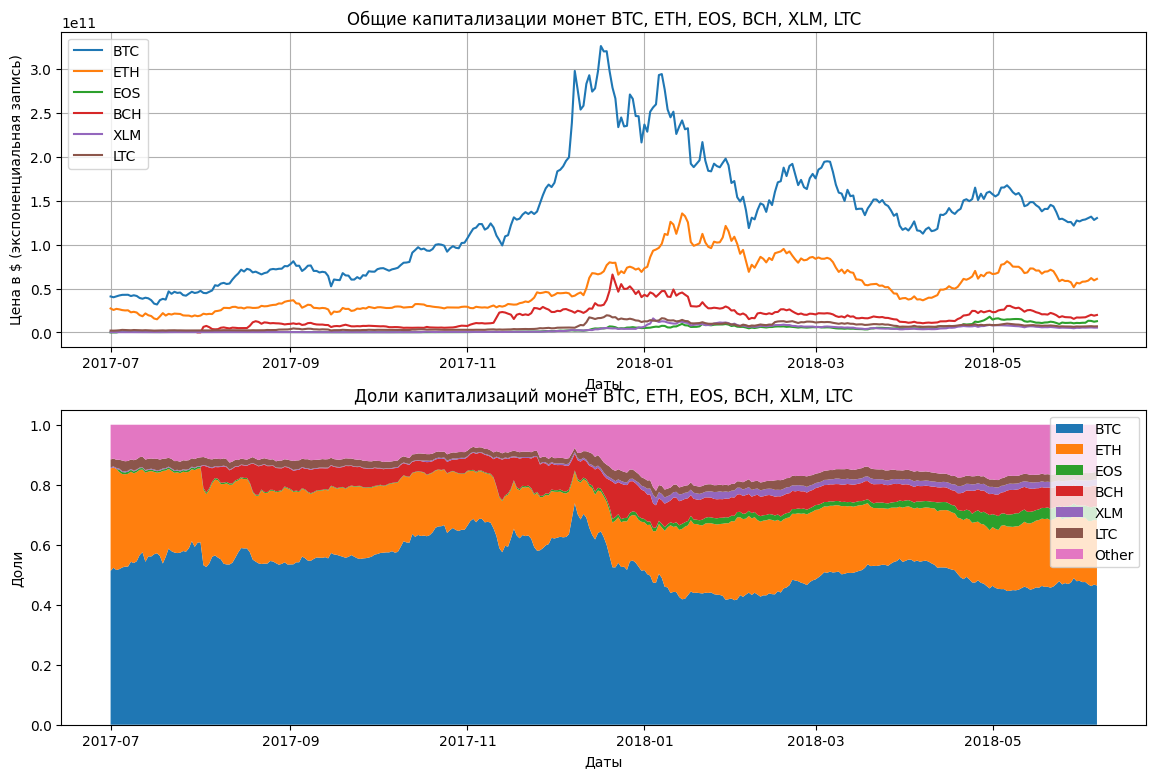

In [24]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут** Пускай закономерности неочевидны, но их все же можео выделить. ETH, XLM, EOS и другие монеты (Other) обратно зависимы от доли капитализации биткоина, а у BCH и LTC закономерности не прослеживается. Причина такой зависимости скорее всего в схожести функций зависимых монет и биткоина - когда его становится меньше, другие монеты занимают его место, так как спрос на криптовалюты данной функции не падает.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [25]:
def calc_coins_correlations(coins, date, symbols, window, alpha):

    whole_market = np.array([np.sum(np.array(list(coins[coins['date'] == i]['market']))) for i in coins[coins['date'] <= date]['date'].unique()])
    coins_shares = {}

    for i in symbols:
      coin_info = coins[(coins['symbol'] == i) & (coins['date'] <= date)]
      coin_market = coin_info['market']
      
      if len(coin_market) < len( whole_market):
        zer = np.zeros(len( whole_market) - len(coin_info['market']))
        zer = np.append(zer, coin_market)
        coin_market = zer

      coin_share = np.array(coin_market) / whole_market
      m_coin_share = list(pd.Series(coin_share).ewm(alpha=alpha).mean())
      coins_shares[i] = m_coin_share[-(window+1):]

    df = pd.DataFrame(coins_shares)
    return df.corr()
    # Paste your code here

In [26]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-26-5cb301b2dfa8>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,0.00,0.77,-0.96,-0.81,-0.74,-0.91
ETH,0.00,1.00,-0.32,-0.28,-0.58,-0.60,-0.39
EOS,0.77,-0.32,1.00,-0.66,-0.45,-0.50,-0.58
BCH,-0.96,-0.28,-0.66,1.00,0.93,0.88,0.98
XLM,-0.81,-0.58,-0.45,0.93,1.00,0.96,0.97
LTC,-0.74,-0.60,-0.50,0.88,0.96,1.00,0.91
ADA,-0.91,-0.39,-0.58,0.98,0.97,0.91,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [27]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-27-c2d058096282>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.49,-0.81,-0.80,-0.73,-0.65,-0.87
ETH,-0.49,1.00,-0.06,0.77,-0.20,-0.23,0.04
EOS,-0.81,-0.06,1.00,0.31,0.99,0.96,0.98
BCH,-0.80,0.77,0.31,1.00,0.21,0.07,0.42
XLM,-0.73,-0.20,0.99,0.21,1.00,0.97,0.97
LTC,-0.65,-0.23,0.96,0.07,0.97,1.00,0.91
ADA,-0.87,0.04,0.98,0.42,0.97,0.91,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

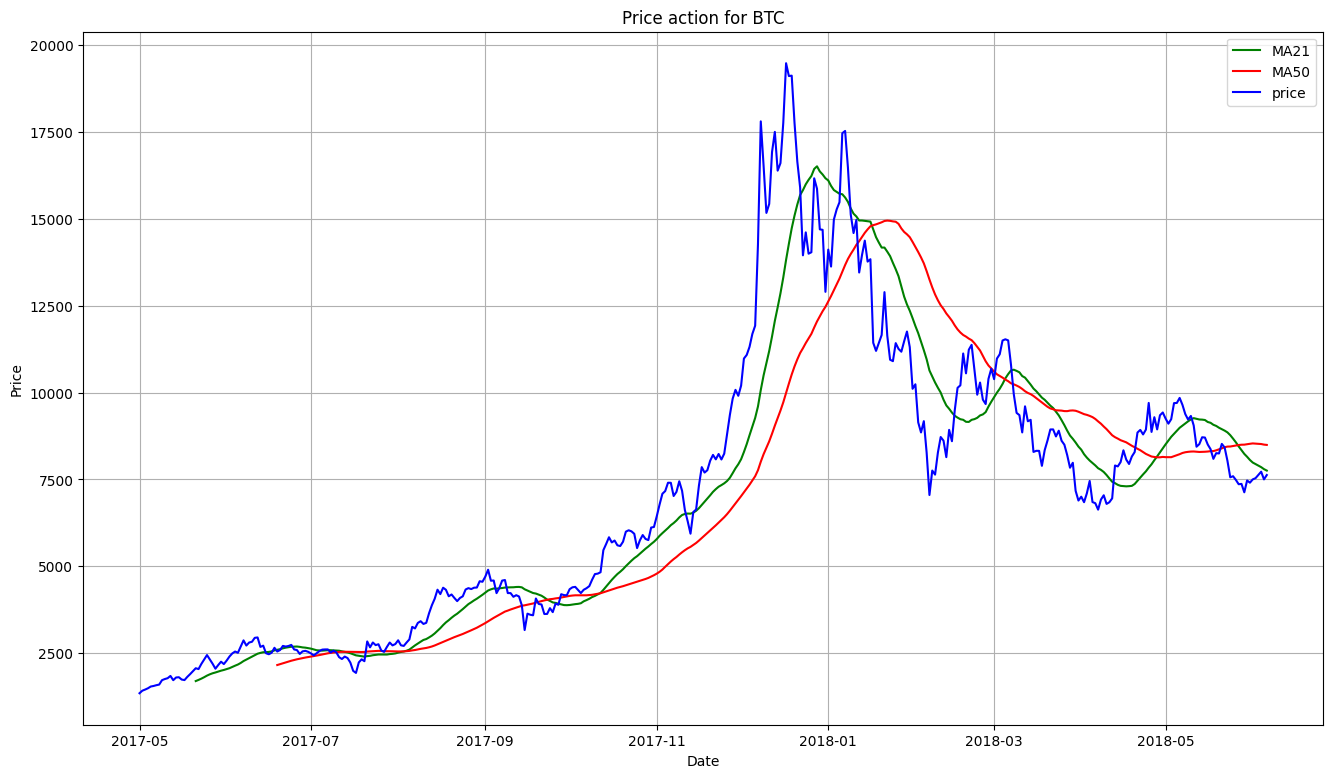

In [28]:
coins = pd.read_csv('coins.csv', index_col='date')
coins.index = pd.to_datetime(coins.index)
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [29]:
#Мне показалось задание странно сформулированным, поэтому я сделал его так: на левом графике отображается цена портфеля двух стратегий.
#При использовании трейдинговой стратегии, мы начинаем с одной позиции и постепенно ее увеличиваем, если выполняется условие с трешхолдом
#При купить и держать мы сразу закупаемся на ту сумму, которую в итоге потратили на дозакупки при трейдиноговой стратегии
#Так кажется логичней, иначе непонятно, как корректно считать мультипликаторы для двух случаев - с ростом количества монет при том определении,
#что было дано в условии они останутся теми же самыми и графики просто совпадут
#Мы же скорее хотим сравнить доходности двух стратегий (при одинаковых вложениях, конечно)

def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['close']
    leading_mean = price.rolling(window=lead_window).mean()
    lagging_mean = price.rolling(window=lag_window).mean()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

    ax2.plot(price, label=f'Цена {symbol}')
    ax2.plot(leading_mean, label='Ведущая средняя')
    ax2.plot(lagging_mean, label='Запаздывающая средняя')
    ax2.legend(loc='upper left')
    ax2.set_xlabel('Даты')
    ax2.set_ylabel('Цена')
    ax2.grid()
    ax2.set_title(f'Цена и скользящие средние {symbol}')


    str_1_mults_raw = coin['close'] / coin['close'].shift(1).fillna(coin['close'][0])

    str_1_mult = [1]
    for i in range(1, len(str_1_mults_raw)):
      mul = str_1_mult[i - 1] * str_1_mults_raw[i]
      str_1_mult.append(mul)


    quan = 1
    investments = price[0]
    portfolio_price_2 = [investments]
    
    for i in range(1, len(price.index)):
      
      if (leading_mean[i] - lagging_mean[i]) / float(price[i]) >= threshold:
        investments += float(price[i])
        quan += 1
      portfolio_price_2.append(quan * price[i])


    portfolio_price_1 = investments * np.array(str_1_mult)
 

    ax1.plot(price.index, portfolio_price_1, label=f'Стратегия купить и держать(1 шт.) {symbol}')
    ax1.plot(price.index, portfolio_price_2, label=f'Стратегия постепенно докупать {symbol}')
    ax1.legend(loc='upper left')
    ax1.set_xlabel('Даты')
    ax1.set_ylabel('Цена портфеля')
    ax1.grid()
    ax1.set_title(f'Доходности стратегий для {symbol}')

    


interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

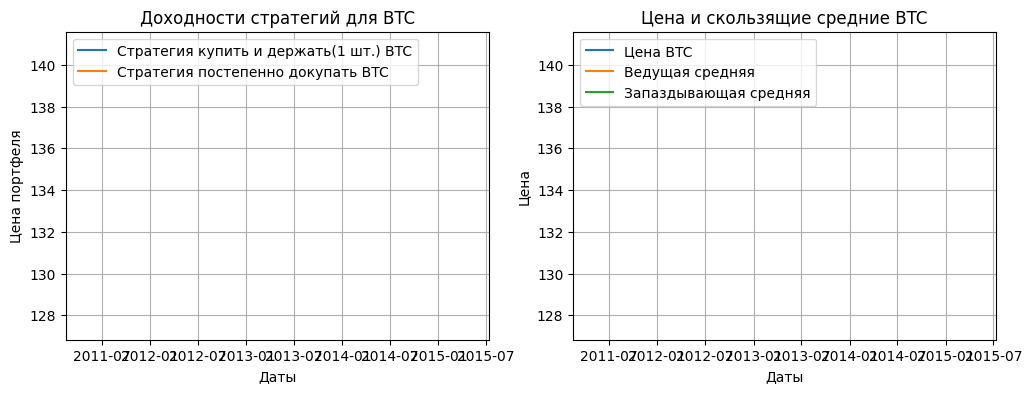

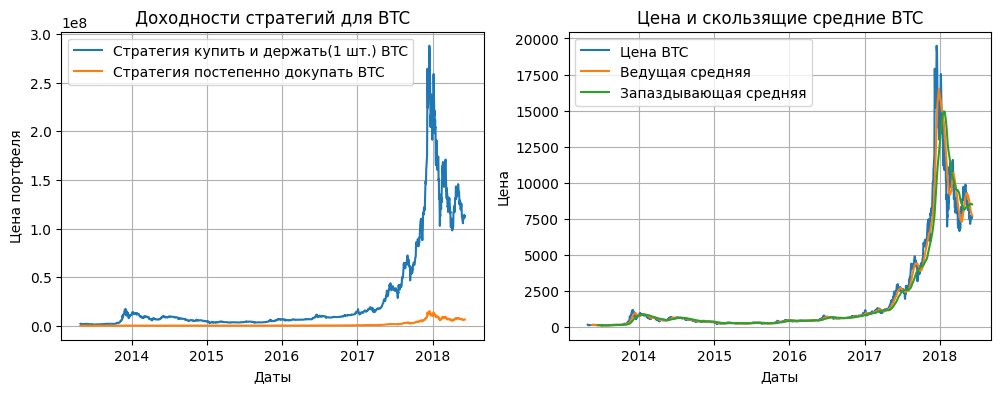

In [30]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут** В целом сложная стратегия уступает простой покупать и держать. 

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.